# Time Series Forecasting, Methods and Trends

**Ronny A. Meza A. and Alberto Fernández H**

# Introduction

This notebook is the complement of an article with the same name. In this notebook we are to share the data and methodology used for to reach the goals. The main objective will be to evaluate the evolution of the time series forecasting methods and the different topics to which it was applied over time. The main objective will be to evaluate the evolution of the time series forecasting methods and the different topics to which it was applied over time. In this way, we downloaded the references from Web of Sciences, with the following search criterias: Query: (TS=(time* AND series* AND forecasting)) AND LANGUAGE: (English) AND DOCUMENT TYPES: (Article OR Book Chapter OR Data Paper OR Database Review). The references with the all fields were downloaded in batches of 500 until until completing all the references of the search. For more information about getting bibliography metadata consult the following link: Bibliographyc Metadata.

The analysis was developed using Tethne Python package. Tethne is a Python software package for parsing and analyzing bibliographic metadata; This tool was developed by the Laubichler Lab and the Digital Innovation Group at Arizona State University as part of an initiative for digital and computational humanities (d+cH). It is important to take in consideration that Tethne is developed in Python 2.7. Python 3 is a distinct language from Python 2.7, and many packages have not yet made the leap to this new platform. A Python 3-compatible version is in the works.

In this project we use Tethne because, it provides tools for easily parsing and analyzing bibliographic data in Python. The primary emphasis is on working with data from the Web of Science database, and also, Tethne provides efficient methods for modeling and analyzing topics changing in time.

In [1]:
#Libraries
#%reset
%pylab inline
from tethne.readers import wos
from tethne.readers import merge
import matplotlib.pyplot as plt
from tethne import networks
from tethne.writers.graph import to_graphml
from tethne import bibliographic_coupling
from tethne.networks import authors
from tethne.utilities import _iterable
from tethne import GraphCollection
from tethne.networks import coauthors
import networkx as nx
from collections import defaultdict
import warnings
from tethne import networks
from pprint import pprint
from tethne import tokenize
from tethne.model.corpus import mallet
from tethne.networks import topics
from tethne.writers import graph
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sns
from tethne.analyze.corpus import burstness
from tethne.plot import plot_burstness
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
wos_corpus = wos.read('/home/ronny/Documentos/Artículos Doctorado/jupyter_codes/WOS')

## 2. Methodology
References from **Web of Sciences** with the following search parameters: *(TS=(time* AND series* AND forecasting)) AND LANGUAGE: (English) AND DOCUMENT TYPES: (Article OR Book Chapter OR Data Paper OR Database Review).* `The time windows is from 1900 to march, 15, 2019`. 

The Tethne' library called **read** can to load a list of Papers from a directory containing multiple data files; in our case, we have 31 records. Only it is necesary to provide the path to a directory containing several WoS field-tagged data files. The read function knows that your path is a directory and not a data file. 

In [3]:
wos_corpus = wos.read('/home/ronny/Documentos/Artículos Doctorado/Article_1_py/WOS')

In [4]:
ref_num = len(wos_corpus)
print 'Loaded %i Web of Sciences references' % ref_num

Loaded 15106 Web of Sciences references


In [5]:
#Creating graphics with Latex properties
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from __future__ import unicode_literals
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

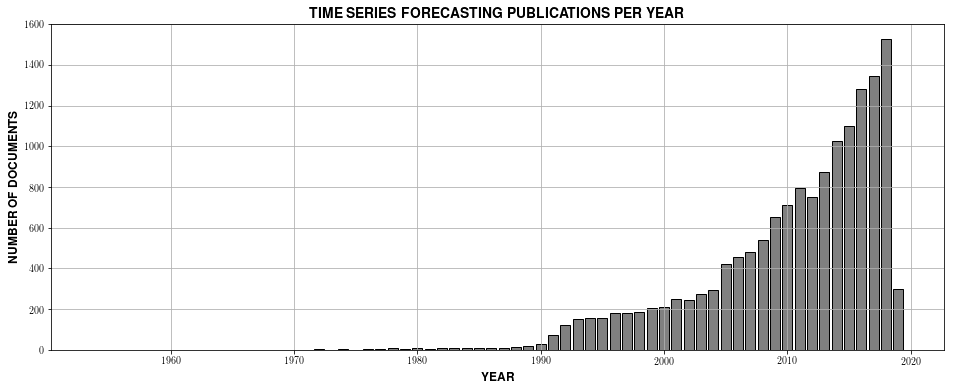

In [6]:
#Note that we can look how documents themselves are distributed using the distribution() method.

#plt.rcParams["figure.figsize"]= [6.4, 4]
plt.rcParams["figure.figsize"]= [16, 6]

plt.bar(*wos_corpus.distribution(), color='gray', edgecolor='black')    # <-- The action.

plt.xlabel(r'\textbf{YEAR}', fontsize=12)
plt.ylabel(r'\textbf{NUMBER OF DOCUMENTS}', fontsize=12)
plt.title(r'\textbf{TIME SERIES FORECASTING PUBLICATIONS PER YEAR}', fontsize=14, color='k')
plt.grid(True)
#plt.savefig('figure_1')
plt.show()

## 2.1 WoS Abstracts

The abstract_to_features method converts all of the available abstracts in our Corpus to a unigram featureset. It takes no arguments. The abstracts will be diced up into their constituent words, punctuation and capitalization is removed, and a featureset called abstractTerms is generated. By default, abstract_to_features will apply the NLTK stoplist and Porter stemmer.

In [7]:
wos_corpus.index_feature('abstract', tokenize=tokenize, structured=True)

In [8]:
wos_corpus.features.keys()

[u'abstract', 'citations', 'authors']

In [9]:
print 'There are {0} features in the abstract featureset.'.format(len(wos_corpus.features['abstract'].index))

There are 49571 features in the abstract featureset.


In [10]:
print 'Only {0} of {1} papers have abstracts'.format(len(wos_corpus.features['abstract'].features), len(wos_corpus.papers))

Only 14992 of 15106 papers have abstracts


In [11]:
print 'This corpus contains the following features: \n\t%s' % '\n\t'.join(wos_corpus.features.keys())

This corpus contains the following features: 
	abstract
	citations
	authors


## 3. Analyzing research topics in time series forecasting, each 10 years 
**Dividing the Population**

In [12]:
corpus_1940 = wos_corpus.subcorpus(('date', range(1940, 1990)))
corpus_1990 = wos_corpus.subcorpus(('date', range(1991, 2000)))
corpus_2000 = wos_corpus.subcorpus(('date', range(2001, 2010)))
corpus_2010 = wos_corpus.subcorpus(('date', range(2011, 2020)))

In [13]:
#Function for determinant the corpus length
def len_corpus(corpus_data):
    ref_num1 = len(corpus_data)
    print 'The subcorpus has %i references' % ref_num1

In [14]:
len_corpus(corpus_1940)
len_corpus(corpus_1990)
len_corpus(corpus_2000)
len_corpus(corpus_2010)

The subcorpus has 140 references
The subcorpus has 1406 references
The subcorpus has 3615 references
The subcorpus has 8994 references


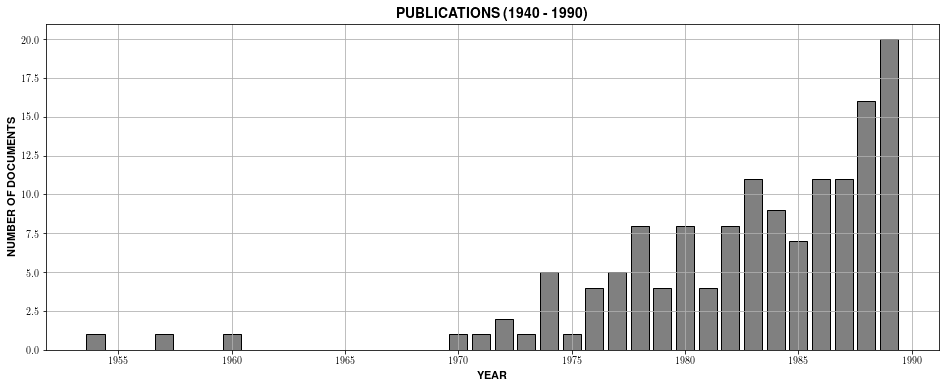

In [15]:
#Subcorpus 1
plt.bar(*corpus_1940.distribution(), color='gray', edgecolor='black')    # <-- The action.
plt.xlabel(r'\textbf{YEAR}', fontsize=11)
plt.ylabel(r'\textbf{NUMBER OF DOCUMENTS}', fontsize=11)
plt.title(r'\textbf{PUBLICATIONS (1940 - 1990)}', fontsize = 14, color='k')
plt.grid(True)

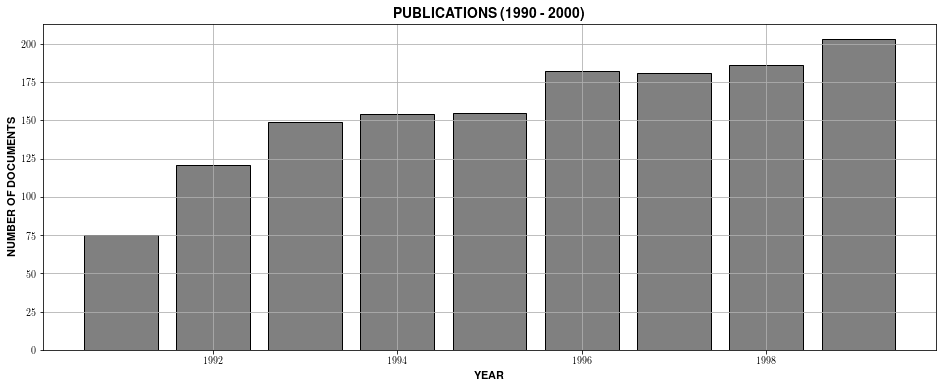

In [16]:
#Subcorpus 2
plt.bar(*corpus_1990.distribution(), color='gray', edgecolor='black')    # <-- The action.
plt.xlabel(r'\textbf{YEAR}', fontsize=11)
plt.ylabel(r'\textbf{NUMBER OF DOCUMENTS}', fontsize=11)
plt.title(r'\textbf{PUBLICATIONS (1990 - 2000)}', fontsize = 14, color='k')
plt.grid(True)

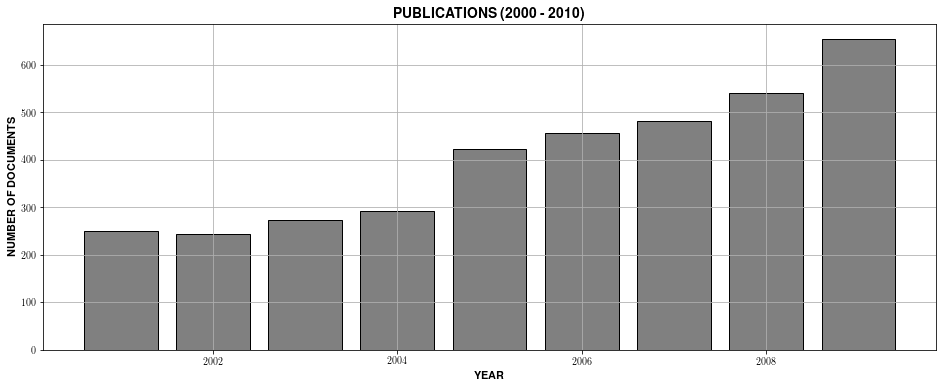

In [17]:
#Subcorpus 3
plt.bar(*corpus_2000.distribution(), color='gray', edgecolor='black')    # <-- The action.
plt.xlabel(r'\textbf{YEAR}', fontsize=11)
plt.ylabel(r'\textbf{NUMBER OF DOCUMENTS}', fontsize=11)
plt.title(r'\textbf{PUBLICATIONS (2000 - 2010)}', fontsize = 14, color='k')
plt.grid(True)

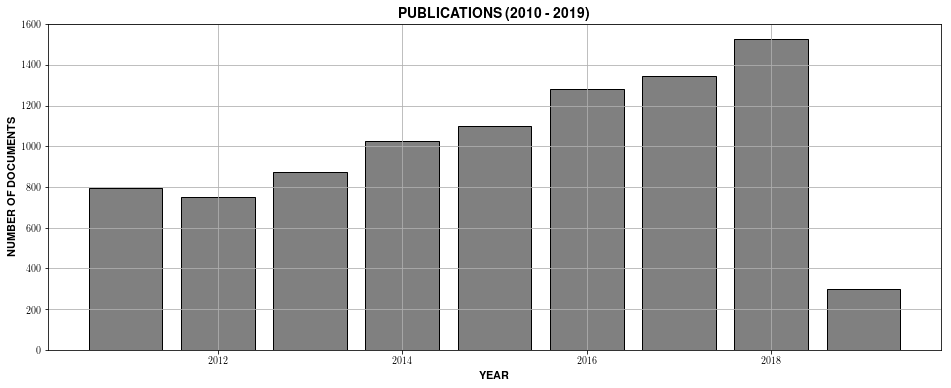

In [18]:
#Subcorpus 4
plt.bar(*corpus_2010.distribution(), color='gray', edgecolor='black')    # <-- The action.
plt.xlabel(r'\textbf{YEAR}', fontsize=11)
plt.ylabel(r'\textbf{NUMBER OF DOCUMENTS}', fontsize=11)
plt.title(r'\textbf{PUBLICATIONS (2010 - 2019)}', fontsize = 14, color='k')
plt.grid(True)
#plt.savefig('subcorpus')

## Subcorpus Keywords Analysis (1940-1990)

In [19]:
#wos_corpus.index('authorKeywords')

corpus_1940.index_feature('authorKeywords')
corpus_1940.features.keys()

[u'abstract', 'citations', u'authorKeywords', 'authors']

In [20]:
store = list()
featureset = corpus_1940.features['authorKeywords']
for k, count in featureset.documentCounts.items():
    store.append((featureset.index[k], count))

Keywords_1940 = sorted(store, key=lambda x: x[1], reverse=True)

print(Keywords_1940[:200])

[(u'TIME SERIES', 27.0), (u'FORECASTING', 19.0), (u'ARIMA', 15.0), (u'BOX-JENKINS', 11.0), (u'ARMA', 9.0), (u'ECONOMIC', 8.0), (u'TIME SERIES FORECASTING', 8.0), (u'ARIMA MODELS', 7.0), (u'FORECASTING MODELS', 7.0), (u'TIME SERIES MODELS', 7.0), (u'EXPONENTIAL SMOOTHING', 5.0), (u'DEMAND', 5.0), (u'STATISTICAL FORECASTS', 5.0), (u'WEATHER', 4.0), (u'AUTOCORRELATION', 4.0), (u'SALES', 4.0), (u'EXOGENOUS VARIABLES', 4.0), (u'TIME SERIES ANALYSIS', 4.0), (u'STOCHASTIC', 4.0), (u'BAYESIAN', 4.0), (u'BOX\u2010JENKINS', 4.0), (u'REGRESSION', 3.0), (u'KALMAN FILTER', 3.0), (u'TIME SERIES MODEL', 3.0), (u'MOVING AVERAGE', 3.0), (u'HOLT-WINTERS', 3.0), (u'ENERGY', 2.0), (u'LINEAR COMBINATION', 2.0), (u'AGGREGATION', 2.0), (u'TIME-SERIES', 2.0), (u'STATISTICS', 2.0), (u'TRANSFER FUNCTION', 2.0), (u'FORECASTING ACCURACY', 2.0), (u'MULTIVARIATE', 2.0), (u'ECONOMETRIC MODELS', 2.0), (u'UNIVARIATE', 2.0), (u'HOLT\u2010WINTERS', 2.0), (u'FINANCIAL', 2.0), (u'LOGISTIC CURVE', 2.0), (u'MARKET', 2.0), (

In [21]:
#Function for search element inside the tuple and show in reverse order
def search_tuple(data, element):
    index = next((i for i,v in enumerate(data) if v[0] == element),-1)
    return(index)

In [22]:
#Searching Time Series Forecasting Method' indexes
winter = search_tuple(Keywords_1940, 'HOLT-WINTERS')
winter2 = search_tuple(Keywords_1940, 'HOLT\u2010WINTERS')

box1 = search_tuple(Keywords_1940, 'BOX-JENKINS')
box2 = search_tuple(Keywords_1940, 'BOX\u2010JENKINS')
box3 = search_tuple(Keywords_1940, 'BOX-JENKINS MODELS')
box4 = search_tuple(Keywords_1940, 'BOX-JENKINS ANALYSIS')

arma1 = search_tuple(Keywords_1940, 'ARMA')
arma2 = search_tuple(Keywords_1940, 'IARMA')
arma3 = search_tuple(Keywords_1940, 'ARARMA MODEL')

arima1 = search_tuple(Keywords_1940, 'ARIMA MODELS')
arima2 = search_tuple(Keywords_1940, 'ARIMA')
arima3 = search_tuple(Keywords_1940, 'ARIMA MODEL')
arima4 = search_tuple(Keywords_1940, 'MULTIVARIATE ARIMA MODELS')

smooth = search_tuple(Keywords_1940, 'EXPONENTIAL SMOOTHING')

stochast = search_tuple(Keywords_1940, 'STOCHASTIC')

bayes = search_tuple(Keywords_1940, 'BAYESIAN')

regress1 = search_tuple(Keywords_1940, 'REGRESSION')
regress2 = search_tuple(Keywords_1940, 'REGRESSION ANALYSIS')
regress3 = search_tuple(Keywords_1940, 'ROBUST REGRESSION')
regress4 = search_tuple(Keywords_1940, 'REGRESSION, DYNAMIC REGRESSION')
regress5 = search_tuple(Keywords_1940, 'TIME-SERIES REGRESSION')

kalman = search_tuple(Keywords_1940, 'KALMAN FILTER')

In [23]:
#Unification list for different forecasting methods

#HOLT-WINTERS
winter_id = Keywords_1940[winter][0]
winter_ref = Keywords_1940[winter][1] + Keywords_1940[winter2][1]
winter_ind = (winter_id, winter_ref)

#BOX-JENKINS
box_id = Keywords_1940[box1][0]
box_ref = Keywords_1940[box1][1] + Keywords_1940[box2][1] + Keywords_1940[box3][1] + Keywords_1940[box4][1]
box_ind = (box_id, box_ref)

#ARMA
arma_id = Keywords_1940[arma1][0]
arma_ref = Keywords_1940[arma1][1] + Keywords_1940[arma2][1] + Keywords_1940[arma3][1]
arma_ind = (arma_id, arma_ref)

#ARIMA
arima_id = Keywords_1940[arima2][0]
arima_ref = Keywords_1940[arima1][1] + Keywords_1940[arima2][1] + Keywords_1940[arima3][1] + Keywords_1940[arima4][1]
arima_ind = (arima_id, arima_ref)

#REGRESSION
regress_id = Keywords_1940[regress1][0]
regress_ref = Keywords_1940[regress1][1] + Keywords_1940[regress2][1] + Keywords_1940[regress3][1] + Keywords_1940[regress4][1] + Keywords_1940[regress5][1]
regress_ind = (regress_id, regress_ref)


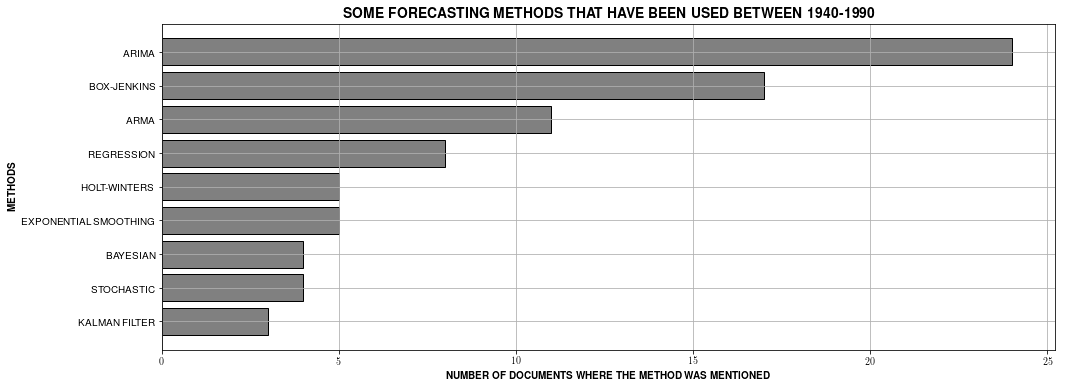

In [24]:
#Bar graph for methods

methods = [Keywords_1940[stochast], Keywords_1940[bayes], Keywords_1940[smooth],
           Keywords_1940[kalman], winter_ind, box_ind, arma_ind, arima_ind, regress_ind]

# sort in-place from highest to lowest
methods.sort(key=lambda x: x[1], reverse=False) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
topic = zip(*methods)[0]
score = zip(*methods)[1]

x_pos = np.arange(len(topic)) 

plt.barh(x_pos, score, align='center', color='gray', edgecolor='black')
plt.yticks(x_pos, topic)
plt.xlabel(r'\textbf{NUMBER OF DOCUMENTS WHERE THE METHOD WAS MENTIONED}')
plt.ylabel(r'\textbf{METHODS}')
plt.title(r'\textbf{SOME FORECASTING METHODS THAT HAVE BEEN USED BETWEEN 1940-1990}', fontsize=14, color='k')

plt.grid(True)
#plt.savefig('figure_2')
plt.show()

In [25]:
#Searching Research Topics index
#ECONOMIC
economic1 = search_tuple(Keywords_1940, 'ECONOMIC')
economic2 = search_tuple(Keywords_1940, 'ECONOMETRIC MODELS')
economic3 = search_tuple(Keywords_1940, 'ECONOMETRIC FORECASTING')
economic4 = search_tuple(Keywords_1940, 'ECONOMETRIC MODEL')
economic5 = search_tuple(Keywords_1940, 'ECONOMIC TIME SERIES')

#SALES
sales1 = search_tuple(Keywords_1940, 'SALES')
sales2 = search_tuple(Keywords_1940, 'SALES FORECASTING')

#ENERGY
energy1 = search_tuple(Keywords_1940, 'ENERGY')
energy2 = search_tuple(Keywords_1940, 'POWER')

demand = search_tuple(Keywords_1940, 'DEMAND')

weather = search_tuple(Keywords_1940, 'WEATHER')

market = search_tuple(Keywords_1940, 'MARKET')

finance = search_tuple(Keywords_1940, 'FINANCIAL')

In [26]:
#Unification list for different forecasting methods

#ECONOMIC
economic_id = Keywords_1940[economic1][0]
economic_ref = Keywords_1940[economic1][1] + Keywords_1940[economic2][1] + Keywords_1940[economic3][1] + Keywords_1940[economic4][1] + Keywords_1940[economic5][1]
economic_ind = (economic_id, economic_ref)

#SALES
sales_id = Keywords_1940[sales1][0]
sales_ref = Keywords_1940[sales1][1] + Keywords_1940[sales2][1]
sales_ind = (sales_id, sales_ref)

#ENERGY
energy_id = Keywords_1940[energy1][0]
energy_ref = Keywords_1940[energy1][1] + Keywords_1940[energy2][1]
energy_ind = (energy_id, energy_ref)

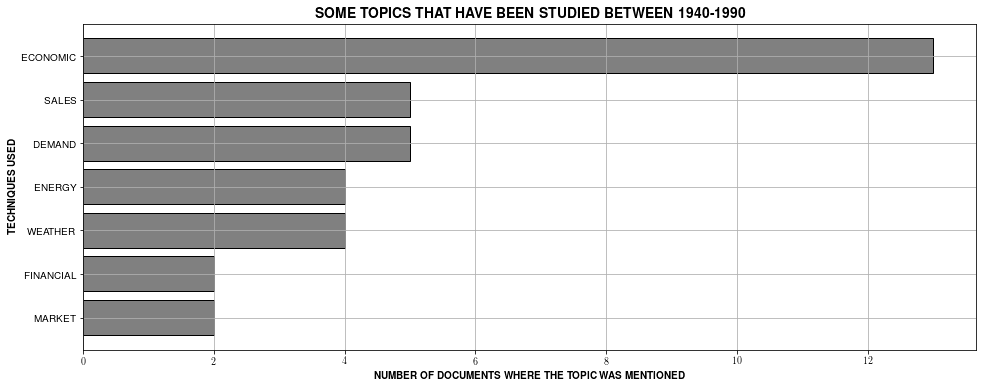

In [27]:
#Bar graph for topics

techniques = [Keywords_1940[demand], Keywords_1940[weather], Keywords_1940[market], Keywords_1940[finance],
           economic_ind, sales_ind, energy_ind]

# sort in-place from highest to lowest
techniques.sort(key=lambda x: x[1], reverse=False) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
technique = zip(*techniques)[0]
score = zip(*techniques)[1]
#print(people)
x_pos = np.arange(len(technique)) 
   
plt.barh(x_pos, score, align='center', color='gray', edgecolor='black')
plt.yticks(x_pos, technique)
plt.xlabel(r'\textbf{NUMBER OF DOCUMENTS WHERE THE TOPIC WAS MENTIONED}')
plt.ylabel(r'\textbf{TECHNIQUES USED}')
plt.title(r'\textbf{SOME TOPICS THAT HAVE BEEN STUDIED BETWEEN 1940-1990}', fontsize=14, color='k')

plt.grid(True)
#plt.savefig('figure_3')
plt.show()


## Subcorpus Keywords Analysis (1991-2000)

In [28]:
#wos_corpus.index('authorKeywords')

corpus_1990.index_feature('authorKeywords')
corpus_1990.features.keys()

[u'abstract', 'citations', u'authorKeywords', 'authors']

In [29]:
store = list()
featureset = corpus_1990.features['authorKeywords']
for k, count in featureset.documentCounts.items():
    store.append((featureset.index[k], count))

Keywords_1990 = sorted(store, key=lambda x: x[1], reverse=True)

print(Keywords_1990[:200])

[(u'TIME-SERIES', 285.0), (u'MODELS', 132.0), (u'MODEL', 78.0), (u'ACCURACY', 61.0), (u'PREDICTION', 59.0), (u'UNIT-ROOT', 53.0), (u'SYSTEMS', 47.0), (u'COINTEGRATION', 40.0), (u'FORECASTS', 37.0), (u'TESTS', 35.0), (u'CHAOS', 34.0), (u'STRANGE ATTRACTORS', 32.0), (u'DYNAMICS', 32.0), (u'PERFORMANCE', 32.0), (u'INTEGRATION', 31.0), (u'INFORMATION', 30.0), (u'SERIES', 29.0), (u'REGRESSION', 29.0), (u'VARIABILITY', 27.0), (u'SYSTEM', 26.0), (u'TRENDS', 26.0), (u'VARIANCE', 24.0), (u'AUTOREGRESSIVE TIME-SERIES', 21.0), (u'CHAOTIC TIME-SERIES', 21.0), (u'BEHAVIOR', 20.0), (u'TIME-SERIES MODELS', 20.0), (u'DEMAND', 19.0), (u'UNITED-STATES', 19.0), (u'EXPECTATIONS', 19.0), (u'DIMENSION', 18.0), (u'MARKET', 18.0), (u'INFERENCE', 18.0), (u'HETEROSKEDASTICITY', 18.0), (u'RATES', 17.0), (u'OUTPUT', 16.0), (u'TEMPERATURE', 15.0), (u'IDENTIFICATION', 15.0), (u'STOCK RETURNS', 15.0), (u'RAINFALL', 14.0), (u'EXTRAPOLATION', 14.0), (u'RETURNS', 14.0), (u'PRICES', 14.0), (u'MONEY', 14.0), (u'BUSINESS-

In [30]:
#Searching Time Series Forecasting Methods

#REGRESSION
regress1 = search_tuple(Keywords_1990, 'REGRESSION')
regress2 = search_tuple(Keywords_1990, 'TIME-SERIES REGRESSION')
regress3 = search_tuple(Keywords_1990, 'LINEAR-REGRESSION')
regress4 = search_tuple(Keywords_1990, 'INTERPOLATION')
regress5 = search_tuple(Keywords_1990, 'EXTRAPOLATION')

#AUTOREGRESSIVE
arima1 = search_tuple(Keywords_1990, 'AUTOREGRESSIVE TIME-SERIES')
arima2 = search_tuple(Keywords_1990, 'ARIMA')

#HETEROSCEDASTICITY
hetero1 = search_tuple(Keywords_1990, 'HETEROSKEDASTICITY')
hetero2 = search_tuple(Keywords_1990, 'CONDITIONAL HETEROSKEDASTICITY')
hetero3 = search_tuple(Keywords_1990, 'HETEROSCEDASTICITY')

#NEURAL NETWORKS
neural1 = search_tuple(Keywords_1990, 'NEURAL NETWORKS')
neural2 = search_tuple(Keywords_1990, 'MULTILAYER FEEDFORWARD NETWORKS')

lyapunov = search_tuple(Keywords_1990, 'LYAPUNOV EXPONENTS')

simu = search_tuple(Keywords_1990, 'SIMULATION')

#COINTEGRATION VECTORS
vector = search_tuple(Keywords_1990, 'COINTEGRATION VECTORS')

In [31]:
#Unification list for different forecasting methods

#REGRESSION
regress_id = Keywords_1990[regress1][0]
regress_ref = Keywords_1990[regress1][1] + Keywords_1990[regress2][1] + Keywords_1990[regress3][1] + Keywords_1990[regress4][1] + Keywords_1990[regress5][1]
regress_ind = (regress_id, regress_ref)


#AUTOREGRESSIVE
arima_id = Keywords_1990[arima2][0]
arima_ref = Keywords_1990[arima1][1] + Keywords_1990[arima2][1]
arima_ind = (arima_id, arima_ref)

#HETEROSCEDASTICITY
hetero_id = Keywords_1990[hetero1][0]
hetero_ref = Keywords_1990[hetero1][1] + Keywords_1990[hetero2][1] + Keywords_1990[hetero3][1]
hetero_ind = (hetero_id, hetero_ref)

#NEURAL NETWORKS
neural_id = Keywords_1990[neural1][0]
neural_ref = Keywords_1990[neural1][1] + Keywords_1990[neural2][1]
neural_ind = (neural_id, neural_ref)

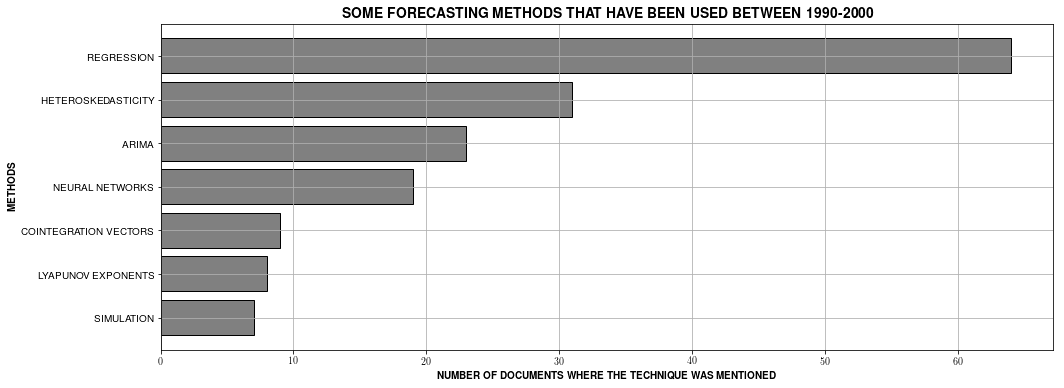

In [32]:
#Bar graph for topics
topics = [Keywords_1990[lyapunov], Keywords_1990[simu], Keywords_1990[vector], regress_ind, arima_ind, hetero_ind, neural_ind]

# sort in-place from highest to lowest
topics.sort(key=lambda x: x[1], reverse=False) 

# reverse the tuples to go from most frequent to least frequent 
topic = zip(*topics)[0]
score = zip(*topics)[1]

x_pos = np.arange(len(topics)) 
  
plt.barh(x_pos, score, align='center', color='gray', edgecolor='black')
plt.yticks(x_pos, topic)
plt.xlabel(r'\textbf{NUMBER OF DOCUMENTS WHERE THE TECHNIQUE WAS MENTIONED}')
plt.ylabel(r'\textbf{METHODS}')
plt.title(r'\textbf{SOME FORECASTING METHODS THAT HAVE BEEN USED BETWEEN 1990-2000}', fontsize=14, color='k')

plt.grid(True)
#plt.savefig('figure_3')
plt.show()

In [33]:
#Searching Time Series Forecasting Topics

#DEMAND
demand = search_tuple(Keywords_1990, 'DEMAND')

#RETURNS
returns1 = search_tuple(Keywords_1990, 'STOCK RETURNS')
returns2 = search_tuple(Keywords_1990, 'RETURNS')

#MARKET
market1 = search_tuple(Keywords_1990, 'MARKET')
market2 = search_tuple(Keywords_1990, 'MARKETS')

#ECONOMIC
economic1 = search_tuple(Keywords_1990, 'ECONOMIC TIME-SERIES')
economic2 = search_tuple(Keywords_1990, 'MACROECONOMIC TIME-SERIES')
economic3 = search_tuple(Keywords_1990, 'ECONOMIC FORECASTS')
economic4 = search_tuple(Keywords_1990, 'ECONOMY')
economic5 = search_tuple(Keywords_1990, 'INFLATION')
economic6 = search_tuple(Keywords_1990, 'INTEREST-RATES')
economic7 = search_tuple(Keywords_1990, 'RATES')

#WEATHER
weather1 = search_tuple(Keywords_1990, 'PRECIPITATION')
weather2 = search_tuple(Keywords_1990, 'CLIMATE')
weather3 = search_tuple(Keywords_1990, 'SEA-SURFACE TEMPERATURE')
weather4 = search_tuple(Keywords_1990, 'TEMPERATURES')
weather5 = search_tuple(Keywords_1990, 'WEATHER')
weather6 = search_tuple(Keywords_1990, 'WEATHER PREDICTION')
weather7 = search_tuple(Keywords_1990, 'SURFACE-TEMPERATURE')
weather8 = search_tuple(Keywords_1990, 'TEMPERATURE')
weather9 = search_tuple(Keywords_1990, 'RAINFALL')

#FINANCES
finances1 = search_tuple(Keywords_1990, 'VOLATILITY')
finances2 = search_tuple(Keywords_1990, 'STOCHASTIC VOLATILITY') 

#CONSUMPTION
consumption1 = search_tuple(Keywords_1990, 'CONSUMPTION')

In [34]:
#Unification list for different forecasting topics

#RETURNS
returns_id = Keywords_1990[returns1][0]
returns_ref = Keywords_1990[returns1][1] + Keywords_1990[returns2][1]
returns_ind = (returns_id, returns_ref)

#MARKET
market_id = Keywords_1990[market2][0]
market_ref = Keywords_1990[market1][1] + Keywords_1990[market2][1]
market_ind = (market_id, market_ref)

#ECONOMIC
economic_id = Keywords_1990[economic4][0]
economic_ref = Keywords_1990[economic1][1] + Keywords_1990[economic2][1] + Keywords_1990[economic3][1] + Keywords_1990[economic4][1] + Keywords_1990[economic5][1] + Keywords_1990[economic6][1] + Keywords_1990[economic7][1]
economic_ind = (economic_id, economic_ref)

#WEATHER
weather_id = Keywords_1990[weather5][0]
weather_ref = Keywords_1990[weather1][1] + Keywords_1990[weather2][1] + Keywords_1990[weather3][1] + Keywords_1990[weather4][1] + Keywords_1990[weather5][1] + Keywords_1990[weather6][1] + Keywords_1990[weather7][1] + Keywords_1990[weather8][1] + + Keywords_1990[weather9][1]
weather_ind = (weather_id, weather_ref)

finances_id = Keywords_1990[finances1][0]
finances_ref = Keywords_1990[finances1][1] + Keywords_1990[finances2][1]
finances_ind = (finances_id, finances_ref)


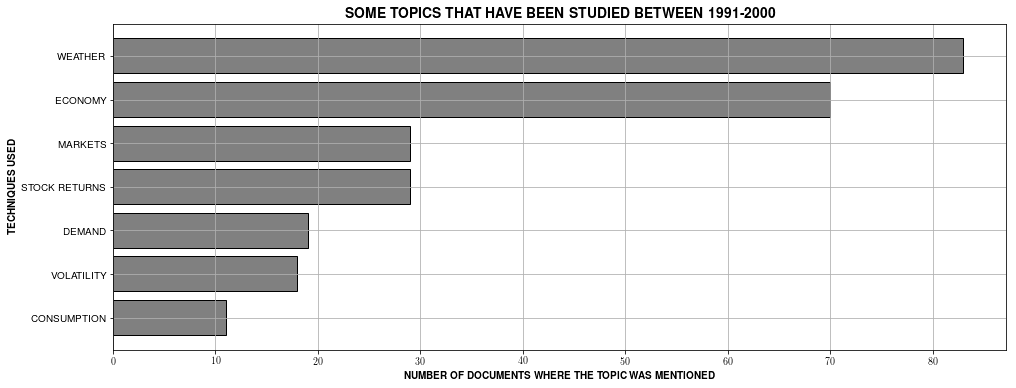

In [35]:
#Bar graph for topics

techniques = [Keywords_1990[demand], Keywords_1990[consumption1], returns_ind, market_ind, economic_ind, weather_ind, finances_ind]

# sort in-place from highest to lowest
techniques.sort(key=lambda x: x[1], reverse=False) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
technique = zip(*techniques)[0]
score = zip(*techniques)[1]

x_pos = np.arange(len(technique)) 
   
plt.barh(x_pos, score, align='center', color='gray', edgecolor='black')
plt.yticks(x_pos, technique)
plt.xlabel(r'\textbf{NUMBER OF DOCUMENTS WHERE THE TOPIC WAS MENTIONED}')
plt.ylabel(r'\textbf{TECHNIQUES USED}')
plt.title(r'\textbf{SOME TOPICS THAT HAVE BEEN STUDIED BETWEEN 1991-2000}', fontsize=14, color='k')

plt.grid(True)
#plt.savefig('figure_3')
plt.show()

# Subcorpus Keywords Analysis (2001 - 2010)

In [36]:
#wos_corpus.index('authorKeywords')

corpus_2000.index_feature('authorKeywords')
corpus_2000.features.keys()

[u'abstract', 'citations', u'authorKeywords', 'authors']

In [37]:
store = list()
featureset = corpus_2000.features['authorKeywords']
for k, count in featureset.documentCounts.items():
    store.append((featureset.index[k], count))

Keywords_2000 = sorted(store, key=lambda x: x[1], reverse=True)

print(Keywords_2000[:200])

[(u'TIME-SERIES', 709.0), (u'MODELS', 366.0), (u'PREDICTION', 339.0), (u'MODEL', 297.0), (u'TESTS', 118.0), (u'SYSTEM', 118.0), (u'REGRESSION', 112.0), (u'NEURAL-NETWORKS', 107.0), (u'VARIABILITY', 103.0), (u'FORECASTS', 102.0), (u'ACCURACY', 100.0), (u'UNIT-ROOT', 93.0), (u'SYSTEMS', 92.0), (u'DYNAMICS', 85.0), (u'COINTEGRATION', 73.0), (u'INFORMATION', 73.0), (u'ARTIFICIAL NEURAL-NETWORKS', 73.0), (u'SERIES', 69.0), (u'VARIANCE', 69.0), (u'IDENTIFICATION', 69.0), (u'UNITED-STATES', 66.0), (u'INFERENCE', 65.0), (u'TIME-SERIES MODELS', 65.0), (u'VOLATILITY', 65.0), (u'RETURNS', 64.0), (u'PERFORMANCE', 64.0), (u'PRICES', 62.0), (u'DEMAND', 61.0), (u'PRECIPITATION', 61.0), (u'MARKET', 60.0), (u'SELECTION', 59.0), (u'TEMPERATURE', 57.0), (u'TRENDS', 55.0), (u'RAINFALL', 54.0), (u'BUSINESS-CYCLE', 52.0), (u'CLIMATE', 49.0), (u'TIME', 49.0), (u'PATTERNS', 49.0), (u'ENROLLMENTS', 48.0), (u'INFLATION', 47.0), (u'NEURAL-NETWORK', 47.0), (u'RISK', 45.0), (u'NETWORKS', 45.0), (u'SIMULATION', 44.

In [38]:
#Searching Time Series Forecasting Methods

#REGRESSION
regress1 = search_tuple(Keywords_2000, 'REGRESSION')
regress2 = search_tuple(Keywords_2000, 'AUTOREGRESSIVE TIME-SERIES')
regress3 = search_tuple(Keywords_2000, 'TRANSITION AUTOREGRESSIVE MODELS')
regress4 = search_tuple(Keywords_2000, 'AUTOREGRESSIVE MODELS')
regress5 = search_tuple(Keywords_2000, 'REGRESSION-MODELS')
regress6 = search_tuple(Keywords_2000, 'LINEAR-MODELS')

#NEURAL-NETWORKS
neural1 = search_tuple(Keywords_2000, 'NEURAL-NETWORKS')
neural2 = search_tuple(Keywords_2000, 'ARTIFICIAL NEURAL-NETWORKS')
neural3 = search_tuple(Keywords_2000, 'NEURAL-NETWORK')
neural4 = search_tuple(Keywords_2000, 'NETWORKS')
neural5 = search_tuple(Keywords_2000, 'ARTIFICIAL NEURAL-NETWORK')
neural6 = search_tuple(Keywords_2000, 'MULTILAYER FEEDFORWARD NETWORKS')
neural7 = search_tuple(Keywords_2000, 'NEURAL NETWORKS')

#GENETIC ALGORITHMS
genetic1 = search_tuple(Keywords_2000, 'GENETIC ALGORITHMS')
genetic2 = search_tuple(Keywords_2000, 'GENETIC ALGORITHM')

#HETEROSKEDASTICITY
hetero1 = search_tuple(Keywords_2000, 'HETEROSKEDASTICITY')
hetero2 = search_tuple(Keywords_2000, 'CONDITIONAL HETEROSKEDASTICITY')
hetero3 = search_tuple(Keywords_2000, 'AUTOREGRESSIVE CONDITIONAL HETEROSKEDASTICITY')
hetero4 = search_tuple(Keywords_2000, 'CONDITIONAL HETEROSCEDASTICITY')
hetero5 = search_tuple(Keywords_2000, 'HETEROSCEDASTICITY')

#ARIMA
arima1 = search_tuple(Keywords_2000, 'ARIMA')
arima2 = search_tuple(Keywords_2000, 'ARIMA MODELS')

#SUPPORT VECTOR MACHINES
svm1 = search_tuple(Keywords_2000, 'SUPPORT VECTOR MACHINES')

#KALMAN FILTER
kalman1 = search_tuple(Keywords_2000, 'KALMAN FILTER')

#BOOTSTRAP
bootstrap1 = search_tuple(Keywords_2000, 'BOOTSTRAP')

#COINTEGRATION VECTORS
vector1 = search_tuple(Keywords_2000, 'COINTEGRATION VECTORS')


In [39]:
#Unification list for different forecasting methods

#REGRESSION
regress_id = Keywords_2000[regress1][0]
regress_ref = Keywords_2000[regress1][1] + Keywords_2000[regress2][1] + Keywords_2000[regress3][1] + Keywords_2000[regress4][1] + Keywords_2000[regress5][1] + Keywords_2000[regress6][1]  
regress_ind = (regress_id, regress_ref)

#NEURAL-NETWORKS
neural_id = Keywords_2000[neural1][0]
neural_ref = Keywords_2000[neural1][1] + Keywords_2000[neural2][1] + Keywords_2000[neural3][1] + Keywords_2000[neural4][1] + Keywords_2000[neural5][1] + Keywords_2000[neural6][1] + Keywords_2000[neural7][1] 
neural_ind = (neural_id, neural_ref)

#GENETIC ALGORITHMS
genetic_id = Keywords_2000[genetic1][0]
genetic_ref = Keywords_2000[genetic1][1] + Keywords_2000[genetic2][1] 
genetic_ind = (genetic_id, genetic_ref)

#HETEROSKEDASTICITY
hetero_id = Keywords_2000[hetero1][0]
hetero_ref = Keywords_2000[hetero1][1] + Keywords_2000[hetero2][1] + Keywords_2000[hetero3][1] + Keywords_2000[hetero4][1] + Keywords_2000[hetero5][1]  
hetero_ind = (hetero_id, hetero_ref)

#ARIMA
arima_id = Keywords_2000[arima1][0]
arima_ref = Keywords_2000[arima1][1] + Keywords_2000[arima2][1] 
arima_ind = (arima_id, arima_ref)


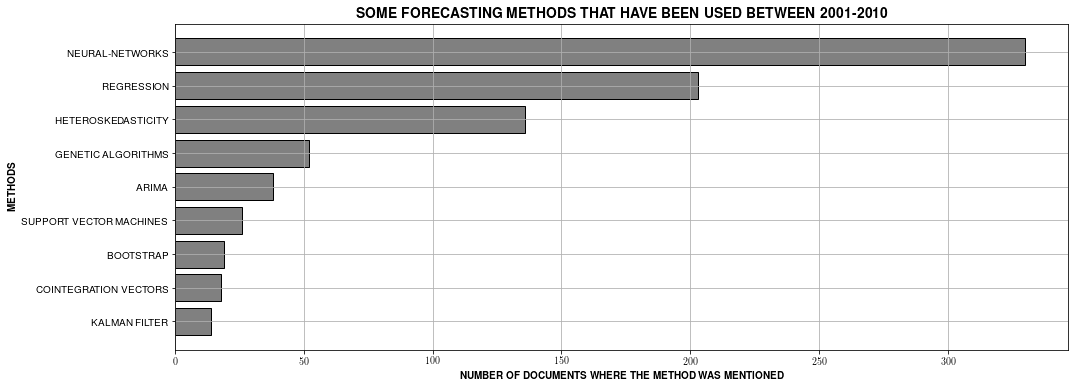

In [40]:
#Bar graph for methods

techniques = [Keywords_2000[vector1], Keywords_2000[bootstrap1], Keywords_2000[kalman1], Keywords_2000[svm1], arima_ind, hetero_ind, genetic_ind, neural_ind, regress_ind]

                                                                   
# sort in-place from highest to lowest
techniques.sort(key=lambda x: x[1], reverse=False) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
technique = zip(*techniques)[0]
score = zip(*techniques)[1]

x_pos = np.arange(len(technique)) 
   
plt.barh(x_pos, score, align='center', color='gray', edgecolor='black')
plt.yticks(x_pos, technique)
plt.xlabel(r'\textbf{NUMBER OF DOCUMENTS WHERE THE METHOD WAS MENTIONED}')
plt.ylabel(r'\textbf{METHODS}')
plt.title(r'\textbf{SOME FORECASTING METHODS THAT HAVE BEEN USED BETWEEN 2001-2010}', fontsize=14, color='k')

plt.grid(True)
#plt.savefig('figure_3')
plt.show()

In [41]:
#Searching Time Series Forecasting topics

#DEMAND
demand1 = search_tuple(Keywords_2000, 'DEMAND')

#CONSUMPTION
consumption1 = search_tuple(Keywords_2000, 'CONSUMPTION')

#TRENDS
trends1 = search_tuple(Keywords_2000, 'TRENDS')

#VOLATILITY
volatil1 = search_tuple(Keywords_2000, 'VOLATILITY')
volatil2 = search_tuple(Keywords_2000, 'STOCK-MARKET VOLATILITY')
volatil3 = search_tuple(Keywords_2000, 'STOCHASTIC VOLATILITY')

#MARKET
market1 = search_tuple(Keywords_2000, 'MARKET')
market2 = search_tuple(Keywords_2000, 'RETURNS')
market3 = search_tuple(Keywords_2000, 'MARKETS')
market4 = search_tuple(Keywords_2000, 'PRICES')
market5 = search_tuple(Keywords_2000, 'STOCK RETURNS')

#WEATHER
weather1 = search_tuple(Keywords_2000, 'WEATHER')
weather2 = search_tuple(Keywords_2000, 'TEMPERATURE')
weather3 = search_tuple(Keywords_2000, 'RAINFALL')
weather4 = search_tuple(Keywords_2000, 'CLIMATE')
weather5 = search_tuple(Keywords_2000, 'EL-NINO')
weather6 = search_tuple(Keywords_2000, 'PRECIPITATION')
weather7 = search_tuple(Keywords_2000, 'CLIMATE-CHANGE')
weather8 = search_tuple(Keywords_2000, 'SEA')
weather9 = search_tuple(Keywords_2000, 'AIR-POLLUTION')
weather10 = search_tuple(Keywords_2000, 'RAINFALL-RUNOFF MODELS')
weather11 = search_tuple(Keywords_2000, 'NORTH-ATLANTIC OSCILLATION')
weather12 = search_tuple(Keywords_2000, 'SOUTHERN OSCILLATION')
weather13 = search_tuple(Keywords_2000, 'ATMOSPHERE')
weather14 = search_tuple(Keywords_2000, 'SOIL-MOISTURE')
weather15 = search_tuple(Keywords_2000, 'WATER')
weather16 = search_tuple(Keywords_2000, 'RIVER')
weather17 = search_tuple(Keywords_2000, 'SEA-SURFACE TEMPERATURE')
weather18 = search_tuple(Keywords_2000, 'POLLUTION')
weather19 = search_tuple(Keywords_2000, 'ZONE')

#ECONOMIC TIME-SERIES
economic1 = search_tuple(Keywords_2000, 'ECONOMIC TIME-SERIES')
economic2 = search_tuple(Keywords_2000, 'BUSINESS-CYCLE')
economic3 = search_tuple(Keywords_2000, 'INFLATION')
economic4 = search_tuple(Keywords_2000, 'RISK')
economic5 = search_tuple(Keywords_2000, 'RATES')
economic6 = search_tuple(Keywords_2000, 'MONETARY-POLICY')
economic7 = search_tuple(Keywords_2000, 'EXCHANGE-RATES')
economic8 = search_tuple(Keywords_2000, 'INTEREST-RATES')
economic9 = search_tuple(Keywords_2000, 'BUSINESS CYCLES')
economic10 = search_tuple(Keywords_2000, 'PRICE')


In [42]:
#Unification list for different forecasting methods

#VOLATILITY
volatil_id = Keywords_2000[volatil1][0]
volatil_ref = Keywords_2000[volatil1][1] + Keywords_2000[volatil2][1]  
volatil_ind = (volatil_id, volatil_ref)

#MARKET
market_id = Keywords_2000[market1][0]
market_ref = Keywords_2000[market1][1] + Keywords_2000[market2][1] + Keywords_2000[market3][1] + Keywords_2000[market4][1] + Keywords_2000[market5][1] 
market_ind = (market_id, market_ref)

#WEATHER
weather_id = Keywords_2000[weather1][0]
weather_ref = Keywords_2000[weather1][1] + Keywords_2000[weather2][1] + Keywords_2000[weather3][1] + Keywords_2000[weather4][1] + Keywords_2000[weather5][1] + Keywords_2000[weather6][1] + Keywords_2000[weather7][1] + Keywords_2000[weather8][1] + Keywords_2000[weather9][1] + Keywords_2000[weather10][1] + Keywords_2000[weather11][1] + Keywords_2000[weather12][1] + Keywords_2000[weather13][1] + Keywords_2000[weather14][1] + Keywords_2000[weather15][1] + Keywords_2000[weather16][1] + Keywords_2000[weather17][1] + Keywords_2000[weather18][1] + Keywords_2000[weather19][1] 
weather_ind = (weather_id, weather_ref)

#ECONOMIC TIME-SERIES
economic_id = Keywords_2000[economic1][0]
economic_ref = Keywords_2000[economic1][1] + Keywords_2000[economic2][1] + Keywords_2000[economic3][1] + Keywords_2000[economic4][1] + Keywords_2000[economic5][1] + Keywords_2000[economic6][1] + Keywords_2000[economic7][1] + Keywords_2000[economic8][1] + Keywords_2000[economic9][1] + Keywords_2000[economic10][1] 
economic_ind = (economic_id, economic_ref)


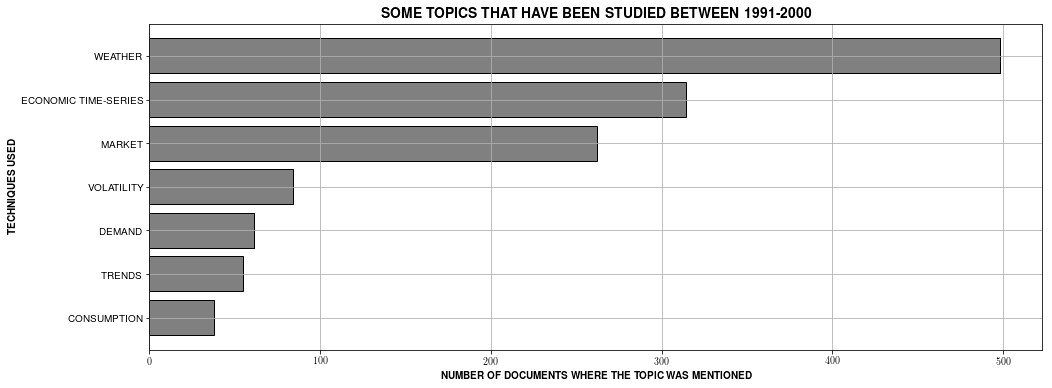

In [43]:
#Bar graph for topics

techniques = [Keywords_2000[demand1], Keywords_2000[consumption1], Keywords_2000[trends1], volatil_ind, market_ind, economic_ind, weather_ind]

# sort in-place from highest to lowest
techniques.sort(key=lambda x: x[1], reverse=False) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
technique = zip(*techniques)[0]
score = zip(*techniques)[1]

x_pos = np.arange(len(technique)) 
   
plt.barh(x_pos, score, align='center', color='gray', edgecolor='black')
plt.yticks(x_pos, technique)
plt.xlabel(r'\textbf{NUMBER OF DOCUMENTS WHERE THE TOPIC WAS MENTIONED}')
plt.ylabel(r'\textbf{TECHNIQUES USED}')
plt.title(r'\textbf{SOME TOPICS THAT HAVE BEEN STUDIED BETWEEN 1991-2000}', fontsize=14, color='k')

plt.grid(True)
#plt.savefig('figure_3')
plt.show()

# Subcorpus Keywords Analysis (2011 - 2019)

In [44]:
#wos_corpus.index('authorKeywords')

corpus_2010.index_feature('authorKeywords')
corpus_2010.features.keys()

[u'abstract', 'citations', u'authorKeywords', 'authors']

In [45]:
store = list()
featureset = corpus_2010.features['authorKeywords']
for k, count in featureset.documentCounts.items():
    store.append((featureset.index[k], count))

Keywords_2010 = sorted(store, key=lambda x: x[1], reverse=True)

print(Keywords_2010[:200])

[(u'TIME-SERIES', 2039.0), (u'PREDICTION', 1366.0), (u'MODEL', 1095.0), (u'MODELS', 844.0), (u'REGRESSION', 480.0), (u'NEURAL-NETWORKS', 476.0), (u'ARTIFICIAL NEURAL-NETWORKS', 455.0), (u'SYSTEM', 443.0), (u'ALGORITHM', 420.0), (u'NEURAL-NETWORK', 327.0), (u'SYSTEMS', 311.0), (u'PERFORMANCE', 293.0), (u'OPTIMIZATION', 292.0), (u'FORECASTS', 265.0), (u'DEMAND', 254.0), (u'DYNAMICS', 238.0), (u'VARIABILITY', 238.0), (u'SELECTION', 237.0), (u'UNIT-ROOT', 230.0), (u'VOLATILITY', 226.0), (u'SERIES', 223.0), (u'MARKET', 222.0), (u'ACCURACY', 204.0), (u'SUPPORT VECTOR MACHINES', 202.0), (u'TESTS', 190.0), (u'PRECIPITATION', 185.0), (u'IMPACT', 178.0), (u'IDENTIFICATION', 176.0), (u'INFORMATION', 174.0), (u'TEMPERATURE', 168.0), (u'DECOMPOSITION', 163.0), (u'RISK', 163.0), (u'CLIMATE-CHANGE', 162.0), (u'ENROLLMENTS', 159.0), (u'UNCERTAINTY', 155.0), (u'ARIMA', 154.0), (u'CHINA', 153.0), (u'MANAGEMENT', 153.0), (u'UNITED-STATES', 149.0), (u'CLASSIFICATION', 146.0), (u'TIME-SERIES MODELS', 144.0

In [56]:
#Searching Time Series Forecasting Methods

#REGRESSION
regress1 = search_tuple(Keywords_2010, 'REGRESSION')
regress2 = search_tuple(Keywords_2010, 'AUTOREGRESSIVE MODELS')
regress3 = search_tuple(Keywords_2010, 'GARCH MODELS')

#NEURAL-NETWORKS
neural1 = search_tuple(Keywords_2010, 'NEURAL-NETWORKS')
neural2 = search_tuple(Keywords_2010, 'ARTIFICIAL NEURAL-NETWORKS')
neural3 = search_tuple(Keywords_2010, 'NEURAL-NETWORK')
neural4 = search_tuple(Keywords_2010, 'ARTIFICIAL NEURAL-NETWORK')
neural5 = search_tuple(Keywords_2010, 'NETWORKS')
neural6 = search_tuple(Keywords_2010, 'NETWORK')
neural7 = search_tuple(Keywords_2010, 'ANN')
neural8 = search_tuple(Keywords_2010, 'NEURAL-NETWORK MODEL')

#OPTIMIZATION
optimiza1 = search_tuple(Keywords_2010, 'OPTIMIZATION')
optimiza2 = search_tuple(Keywords_2010, 'PARTICLE SWARM OPTIMIZATION')

#GENETIC ALGORITHM
genetic1 = search_tuple(Keywords_2010, 'GENETIC ALGORITHM')
genetic2 = search_tuple(Keywords_2010, 'GENETIC ALGORITHMS')

#HETEROSKEDASTICITY
hetero1 = search_tuple(Keywords_2010, 'HETEROSKEDASTICITY')
hetero2 = search_tuple(Keywords_2010, 'CONDITIONAL HETEROSKEDASTICITY')
hetero3 = search_tuple(Keywords_2010, 'AUTOREGRESSIVE CONDITIONAL HETEROSKEDASTICITY')

#SVM
svm1 = search_tuple(Keywords_2010, 'SUPPORT VECTOR MACHINES')
svm1 = search_tuple(Keywords_2010, 'SUPPORT VECTOR REGRESSION')
svm1 = search_tuple(Keywords_2010, 'SUPPORT VECTOR MACHINE')

#ARIMA
arima1 = search_tuple(Keywords_2010, 'ARIMA')
arima2 = search_tuple(Keywords_2010, 'ARIMA MODELS')

#HYBRID
hybrid1 = search_tuple(Keywords_2010, 'HYBRID MODEL')
hybrid2 = search_tuple(Keywords_2010, 'HYBRID ARIMA')

#SIMULATION
simula1 = search_tuple(Keywords_2010, 'SIMULATION')
simula2 = search_tuple(Keywords_2010, 'SIMULATIONS')

#WAVELET
wavelet1 = search_tuple(Keywords_2010, 'WAVELET TRANSFORM')
wavelet2 = search_tuple(Keywords_2010, 'WAVELET')

#FUZZY
fuzzy1 = search_tuple(Keywords_2010, 'FUZZY TIME-SERIES')
fuzzy2 = search_tuple(Keywords_2010, 'FUZZY INFERENCE SYSTEM')
fuzzy3 = search_tuple(Keywords_2010, 'FUZZY')
fuzzy4 = search_tuple(Keywords_2010, 'ANFIS')

#LEARNING-MACHINE
ml1 = search_tuple(Keywords_2010, 'EXTREME LEARNING-MACHINES')

#ENSEMBLE
ensemble1 = search_tuple(Keywords_2010, 'ENSEMBLE')


In [46]:
winter = search_tuple(Keywords_1990, 'HOLT-WINTERS')
winter = search_tuple(Keywords_1990, 'HOLT-WINTERS')
winter = search_tuple(Keywords_1990, 'HOLT-WINTERS')
winter = search_tuple(Keywords_1990, 'HOLT-WINTERS')
winter = search_tuple(Keywords_1990, 'HOLT-WINTERS')

 
 
(u'TRENDS', 135.0),  
     
(u'INFLATION', 121.0), (u'INTEREST-RATES', 43.0),   (u'ECONOMIC-GROWTH', 41.0), (u'MONETARY-POLICY', 78.0), (u'RISK', 163.0), (u'RATES', 78.0), (u'BUSINESS-CYCLE', 65.0), (u'SHRINKAGE', 33.0)

(u'WEATHER', 73.0), (u'TEMPERATURE', 168.0), (u'CLIMATE-CHANGE', 162.0), (u'RAINFALL', 138.0), (u'CLIMATE', 136.0), (u'RIVER', 110.0), (u'PRECIPITATION', 185.0), (u'EL-NINO', 60.0),  (u'WATER', 56.0), (u'AIR-POLLUTION', 44.0), (u'WIND-SPEED', 41.0), (u'OCEAN', 41.0), (u'POLLUTION', 36.0), (u'RIVER-BASIN', 35.0), (u'WIND', 33.0), (u'TEMPERATURE PREDICTION', 61.0), (u'RADIATION', 49.0), (u'ENSO', 34.0),

(u'ENERGY', 100.0), (u'POWER', 113.0), (u'ENERGY-CONSUMPTION', 69.0), (u'POWER-GENERATION', 36.0), (u'ELECTRICITY CONSUMPTION', 35.0),
 
(u'DEMAND', 254.0), 

(u'VOLATILITY', 226.0), (u'REALIZED VOLATILITY', 47.0), (u'STOCHASTIC VOLATILITY', 46.0),

(u'MARKET', 222.0), (u'MARKETS', 124.0), (u'PRICES', 102.0), (u'RETURNS', 137.0), (u'PRICE', 69.0), (u'STOCK-MARKET', 58.0), (u'STOCK', 43.0), (u'STOCK RETURNS', 66.0), 

